In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Database setup
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model b
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

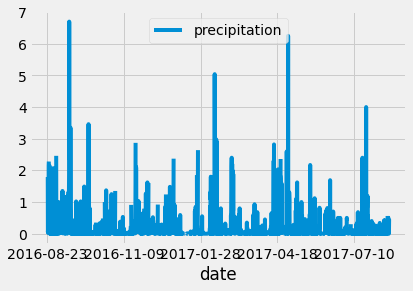

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
results = []

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results,columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [44]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_df = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for x in station_df:
    print (x[0])

USC00519281
USC00519397
USC00513117
USC00519523
USC00516128
USC00514830
USC00511918
USC00517948
USC00518838


In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
for x in station_df:
    info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station == x[0]).all()
    print (info, x)

[(54.0, 85.0, 71.66378066378067)] ('USC00519281', 2772)
[(56.0, 87.0, 74.55323054331865)] ('USC00519397', 2724)
[(59.0, 85.0, 72.68918420081211)] ('USC00513117', 2709)
[(56.0, 85.0, 74.5436493068565)] ('USC00519523', 2669)
[(58.0, 84.0, 70.91500765696784)] ('USC00516128', 2612)
[(58.0, 85.0, 74.8732970027248)] ('USC00514830', 2202)
[(53.0, 87.0, 71.61596766043456)] ('USC00511918', 1979)
[(58.0, 87.0, 74.68440233236151)] ('USC00517948', 1372)
[(58.0, 83.0, 72.72407045009784)] ('USC00518838', 511)


<AxesSubplot:ylabel='Frequency'>

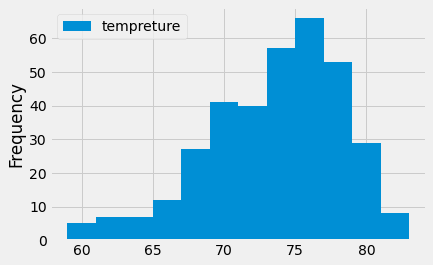

In [72]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.date,Measurement.tobs).\
    filter((Measurement.station == "USC00519281") & (Measurement.date >= prev_year)).all()


df = pd.DataFrame(result,columns=['date','tempreture'])
df.plot.hist(bins=12)

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge